In [1]:
#!pip install split-folders

In [2]:
#import split folders
import splitfolders

In [3]:
#split the data we have from the data folder (covid and non_covid)
#ratio = (train, validation, test)
splitfolders.ratio(input="./data/",
                    output="./output", seed=2021,
                    ratio=(0.7,0.15,0.15))

In [4]:
#import libraries
import keras
import tensorflow
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications import densenet
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

In [5]:
#use transfer learning with DenseNet169

base_model= densenet.DenseNet169(weights="imagenet", include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)

preds = Dense(2, activation="sigmoid")(x)

model= Model(inputs= base_model.input, outputs=preds)

In [6]:
# declare batch size
BATCH_SIZE = 16

In [7]:
# imagedatagenerator objects

train_datagen = ImageDataGenerator(rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
brightness_range=[0.2,1.0],
horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# create train generators

train_generator = train_datagen.flow_from_directory("./output/train",
                                                    target_size=(480, 480),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    shuffle=True)


Found 521 images belonging to 2 classes.


In [9]:
# create val generators

val_generator = train_datagen.flow_from_directory("./output/val",
                                                    target_size=(480, 480),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    shuffle=True)


Found 111 images belonging to 2 classes.


In [10]:
#test generator
#do not shuffle

test_generator = test_datagen.flow_from_directory("./output/test",
shuffle=False)

Found 114 images belonging to 2 classes.


In [11]:
#declare callbacks for our model training

es= EarlyStopping(monitor="val_loss", patience=3) #earlystop
mc = ModelCheckpoint("./best_model.h5",
                        save_best_only=True) #checkopoint

In [12]:
#compile model for training

model.compile(optimizer= Adam(learning_rate=0.0001), loss= "binary_crossentropy", metrics=["accuracy"])



In [13]:
#train model

history = model.fit(train_generator, steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // BATCH_SIZE,
                    epochs=50,
                    callbacks=[es, mc])


Epoch 1/50
32/32 [==============================] - 3277s 102s/step - loss: 0.6364 - accuracy: 0.6733 - val_loss: 0.6271 - val_accuracy: 0.6979
Epoch 2/50
32/32 [==============================] - 3336s 105s/step - loss: 0.4317 - accuracy: 0.8139 - val_loss: 0.5688 - val_accuracy: 0.7292
Epoch 3/50
32/32 [==============================] - 3385s 106s/step - loss: 0.3209 - accuracy: 0.8594 - val_loss: 0.6222 - val_accuracy: 0.7083
Epoch 4/50
32/32 [==============================] - 3296s 103s/step - loss: 0.2459 - accuracy: 0.8931 - val_loss: 0.3239 - val_accuracy: 0.8750
Epoch 5/50
32/32 [==============================] - 3445s 108s/step - loss: 0.2112 - accuracy: 0.9180 - val_loss: 0.4204 - val_accuracy: 0.7812
Epoch 6/50
32/32 [==============================] - 3425s 107s/step - loss: 0.2021 - accuracy: 0.9327 - val_loss: 0.2802 - val_accuracy: 0.8750
Epoch 7/50
32/32 [==============================] - 3431s 108s/step - loss: 0.1265 - accuracy: 0.9525 - val_loss: 0.4067 - val_accuracy:

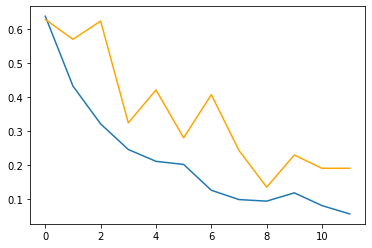

In [16]:
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["val_loss"], color= "orange")

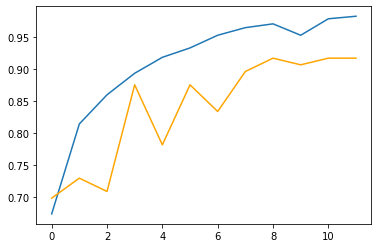

In [17]:
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["val_accuracy"], color="orange")


In [18]:
#look at the test_generator classes
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [19]:
#make predictions using tet data

predictions = model.predict(test_generator)
predictions

array([[4.70200612e-05, 9.99894619e-01],
       [2.64268601e-06, 9.99999166e-01],
       [9.75861847e-02, 9.52866316e-01],
       [9.99786973e-01, 1.36971474e-04],
       [3.52138281e-03, 9.97564852e-01],
       [8.10927759e-06, 9.99991953e-01],
       [9.95961428e-01, 1.99449062e-03],
       [6.89506531e-04, 9.99158800e-01],
       [4.81603165e-05, 9.99940872e-01],
       [7.42197037e-04, 9.99355197e-01],
       [2.96591247e-06, 9.99997377e-01],
       [7.86166787e-02, 9.70741749e-01],
       [7.54879713e-02, 9.41081047e-01],
       [9.99878883e-01, 7.87622557e-05],
       [9.99997675e-01, 1.65837889e-07],
       [9.99881864e-01, 7.71719624e-06],
       [1.37640834e-02, 9.88830090e-01],
       [1.84536874e-02, 9.50903535e-01],
       [8.85846138e-01, 1.86370283e-01],
       [9.24831629e-03, 9.95454788e-01],
       [2.47925520e-03, 9.95450914e-01],
       [1.19804114e-01, 8.13250780e-01],
       [9.93508995e-01, 6.31606579e-03],
       [1.33621693e-03, 9.99255896e-01],
       [1.688292

In [21]:
# use numpy to get predicted classes out

single_pred = np.argmax(predictions, axis=1)
single_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [23]:
confusion_matrix(test_generator.classes, single_pred)

array([[17, 36],
       [ 1, 60]], dtype=int64)

In [ ]:
#predictions
#                     0    1
# actual 0           TN   FP
#        1           FN   TP

In [25]:
print(classification_report(test_generator.classes, single_pred))

              precision    recall  f1-score   support

           0       0.94      0.32      0.48        53
           1       0.62      0.98      0.76        61

    accuracy                           0.68       114
   macro avg       0.78      0.65      0.62       114
weighted avg       0.77      0.68      0.63       114



In [29]:
from keras.models import load_model

saved_model = load_model("best_model.h5")
saved_model

In [30]:
saved_model_predictions = saved_model.predict(test_generator)
saved_single_pred = np.argmax(saved_model_predictions, axis=1)

In [31]:
confusion_matrix(test_generator.classes, saved_single_pred)


array([[24, 29],
       [ 0, 61]], dtype=int64)

In [32]:
print(classification_report(test_generator.classes, saved_single_pred))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        53
           1       0.68      1.00      0.81        61

    accuracy                           0.75       114
   macro avg       0.84      0.73      0.72       114
weighted avg       0.83      0.75      0.72       114



### Room for improvement

1. Try different pre-trained models
2. Add adittional layers to pre-trained model
3. Change drop-out layer[ 0.2, 0.8]
4. Add things that the autors mentioned
